In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
data_folder = Path('archive')
data_folder_raw = Path('archive/raw_data')

In [4]:
file_list =[]
for r,d,f in os.walk('archive'):
    file_list.append(f)

In [5]:
file_list_data = file_list[0]
file_list_raw = file_list[1]

In [6]:
file_list_data = file_list_data[1:]
new_data_small = pd.read_csv(data_folder/file_list_data[0])
new_data_small.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,1,0,1,MORNING,1,49,66,Mesa Airlines Inc.,5021,...,17,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
1,1,1,0,3,EARLY_MORNING,1,8,128,American Airlines Inc.,5021,...,19,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
2,1,1,0,2,MORNING,1,49,99,American Airlines Inc.,5021,...,11,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
3,1,1,0,1,EARLY_MORNING,1,8,99,American Airlines Inc.,5021,...,11,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
4,1,1,0,3,MORNING,1,49,143,Southwest Airlines Co.,5021,...,8,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37


MONTH:				Month

DAY_OF_WEEK:			Day of Week

DEP_DEL15: 			TARGET Binary of a departure delay over 15 minutes (1 is yes)

DISTANCE_GROUP:			Distance group to be flown by departing aircraft

DEP_BLOCK:			Departure block

SEGMENT_NUMBER:			The segment that this tail number is on for the day

CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block

NUMBER_OF_SEATS:		Number of seats on the aircraft

CARRIER_NAME:			Carrier

AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month

AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month

AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport

AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month

AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month

FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline

GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline

PLANE_AGE:			Age of departing aircraft

DEPARTING_AIRPORT:		Departing Airport

LATITUDE:			Latitude of departing airport

LONGITUDE:			Longitude of departing airport

PREVIOUS_AIRPORT:		Previous airport that aircraft departed from

PRCP:				Inches of precipitation for day

SNOW:				Inches of snowfall for day

SNWD:				Inches of snow on ground for day

TMAX:				Max temperature for day

AWND:				Max wind speed for day

In [7]:
new_data_small['DEP_DEL15'].unique()

array([0, 1])

In [8]:
crr_df = new_data_small.corr()['DEP_DEL15']
crr_df = crr_df.abs()
crr_df.sort_values(ascending=False)

DEP_DEL15                        1.000000
PRCP                             0.072290
SEGMENT_NUMBER                   0.067253
DAY_OF_WEEK                      0.055698
AWND                             0.051857
SNOW                             0.036568
AVG_MONTHLY_PASS_AIRLINE         0.032262
AIRLINE_FLIGHTS_MONTH            0.026386
AIRPORT_FLIGHTS_MONTH            0.022902
AVG_MONTHLY_PASS_AIRPORT         0.022860
CONCURRENT_FLIGHTS               0.016459
DISTANCE_GROUP                   0.014529
NUMBER_OF_SEATS                  0.013683
GROUND_SERV_PER_PASS             0.012946
SNWD                             0.012223
FLT_ATTENDANTS_PER_PASS          0.010750
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.009105
LATITUDE                         0.009070
LONGITUDE                        0.008448
PLANE_AGE                        0.003554
TMAX                             0.002281
MONTH                                 NaN
Name: DEP_DEL15, dtype: float64

In [9]:
len(new_data_small['AIRLINE_FLIGHTS_MONTH'].unique())

17

In [10]:
new_data_small['SEGMENT_NUMBER'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [11]:
from matplotlib import pyplot as plt

(array([28373., 28601., 71397., 42374.,     0.,     0., 45371.,     0.,
            0.,     0., 45296., 71074., 69537.,     0.,     0.,     0.,
        96914.]),
 array([  7018.        ,  12949.23529412,  18880.47058824,  24811.70588235,
         30742.94117647,  36674.17647059,  42605.41176471,  48536.64705882,
         54467.88235294,  60399.11764706,  66330.35294118,  72261.58823529,
         78192.82352941,  84124.05882353,  90055.29411765,  95986.52941176,
        101917.76470588, 107849.        ]),
 <BarContainer object of 17 artists>)

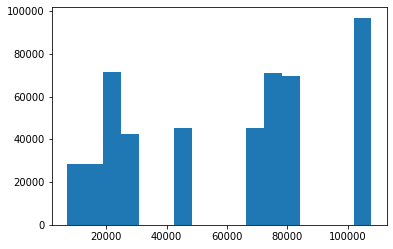

In [12]:
plt.hist(new_data_small['AIRLINE_FLIGHTS_MONTH'],bins=17)

EDA

1.looking at each column and seeing if there are any missing values in any of these columns

2.identify categorical data

3.one hot encoding for categorical data

In [13]:
new_data_small.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DISTANCE_GROUP                   0
DEP_BLOCK                        0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

Categorical Columns

Month

Day of week

Distance Group

Dep Block

Segment Number

Carrier Name

Departing Airport

Previous Airport

In [14]:
#one hot encoding for categorical columns using dummies
categorical_columns = ['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','DEP_BLOCK','SEGMENT_NUMBER','CARRIER_NAME',
                       'DEPARTING_AIRPORT'
                      ,'PREVIOUS_AIRPORT']

In [15]:
dummy = pd.get_dummies(new_data_small[categorical_columns])

In [18]:
data_numerical = new_data_small.drop(columns=categorical_columns)

In [23]:
concat_data = pd.concat([data_numerical,dummy],axis=1)

In [20]:
data_numerical.columns

Index(['DEP_DEL15', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP',
       'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')

finding importance of the features in the dataset

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = concat_data.drop('DEP_DEL15', axis=1)
y = concat_data['DEP_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [38]:
importances.head(15)

,Attribute,Importance
12,PRCP,0.164585
23,DEP_BLOCK_EVENING,0.160013
18,DAY_OF_WEEK,0.137373
32,CARRIER_NAME_Comair Inc.,0.114113
16,AWND,0.109863
9,PLANE_AGE,0.101170
21,DEP_BLOCK_AFTERNOON,0.095479
14,SNWD,0.079676
19,DISTANCE_GROUP,0.071530
56,DEPARTING_AIRPORT_Dallas Fort Worth Regional,0.071283


In [40]:
y_pred = model.predict(X_test_scaled)
model.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.812498496813244

In [52]:
reduced_features = list(importances[importances['Importance']>0]['Attribute'])
reduced_data = concat_data[reduced_features]

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = reduced_data
y = concat_data['DEP_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [57]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
model.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8644245801098328